# Importing the necessary libraries

In [1]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for handling arrays

import os # for interacting with the operating system
from imutils import paths # To access path of images folder
from sklearn.datasets import load_files # for loading files from folders

import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

import cv2 # Open Cv library for images processing
import time # provides various time-related functions
import matplotlib.image as mpimg # Read an image from a file into an array
import random # to select random files

import keras # interface for tensorflow
import tensorflow as tf # for building deep learning models

from sklearn.model_selection import train_test_split #split dataset to train and test sets
from collections import Counter #for counting hashable objects

from keras.models import Model, Sequential # to deal with sequencing of layers within a model
from keras.layers import Dropout, Flatten, Dense, Input # Neural Networks layers
from keras.layers import Conv2D, MaxPooling2D, Activation # Neural Networks layers

from tensorflow.keras.optimizers import Adam # A famous algorithm to update weights during training
from sklearn.metrics import accuracy_score, recall_score, precision_score  # Evaluation 
from sklearn.metrics import classification_report, confusion_matrix
import pickle # to save model

from keras.preprocessing.image import ImageDataGenerator

# Load Dataset

In [2]:
#The path of our data 
data_dir =  r'C:\Users/BUSI Dataset'

#Loading Data
data = load_files(data_dir)

In [3]:
 # to get the files in the specified directory
folders=os.listdir(r"C:\Users/BUSI Dataset")

print(folders)

['Benign Tumor', 'Malignant Tumor']


# Check Data balance

In [4]:
List = []
for i in folders: # pass over sub directories
    path = os.path.join(data_dir, i)
    count = 0
    for file in os.listdir(path): # pass over files in sub directories
        count += 1
        A=[i,count]
    List.append(A)

List # contain classes size

[['Benign Tumor', 536], ['Malignant Tumor', 360]]

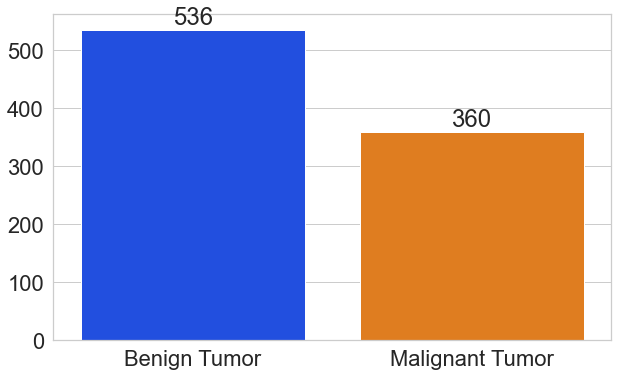

In [6]:
Classes = [item[0] for item in List]

Counts = [item[1] for item in List]

# plotting classes distibution
ax = sns.barplot(x= Classes,y= Counts,palette="bright") 

# customize figsize,font, and color
sns.set(rc={'figure.figsize':(10,6)},style="whitegrid", font_scale=2)  

for i in ax.containers:
    ax.bar_label(i,)

# Data Preprocessing

In [7]:
data = []
img_size = 256

for i in folders:
    path = os.path.join(data_dir, i)
    class_num = folders.index(i)
    for file in os.listdir(path): #pass over files
        filepath = os.path.join(path, file)
        
        # read the images
        img = cv2.imread(filepath, 0)
        
        # resize the images
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])
        
random.shuffle(data)

X, y = [], []
for feature, label in data:
    X.append(feature)
    y.append(label)
    
print('X length:', len(X))
print('y counts:', Counter(y))

# normalize
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0
y = np.array(y)

X length: 896
y counts: Counter({0: 536, 1: 360})


# Spliting Dataset

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=10, stratify=y)

# Class Wieght Model

In [9]:
# building the model

class_weight_model = Sequential()
class_weight_model.add(Conv2D(32, 3, 3, input_shape= X.shape[1:]))
class_weight_model.add(Activation('relu'))
class_weight_model.add(MaxPooling2D(pool_size=(2, 2)))

class_weight_model.add(Conv2D(32, 3, 3))
class_weight_model.add(Activation('relu'))
class_weight_model.add(MaxPooling2D(pool_size=(2, 2)))

class_weight_model.add(Conv2D(32, 3, 3))
class_weight_model.add(Activation('relu'))
class_weight_model.add(MaxPooling2D(pool_size=(2, 2)))

class_weight_model.add(Flatten())
class_weight_model.add(Dense(64))
class_weight_model.add(Activation('relu'))
class_weight_model.add(Dropout(0.5))
class_weight_model.add(Dense(1))
class_weight_model.add(Activation('sigmoid'))

In [10]:
# Creat the weights for the classes

new_weights = {
    0: X_train.shape[0]/(2*Counter(y_train)[0]),
    1: X_train.shape[0]/(2*Counter(y_train)[1]),
}

new_weights

{0: 0.835820895522388, 1: 1.2444444444444445}

In [11]:
# Compiling the CNN
class_weight_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
# training the model

start1 = time.time()

history1 = class_weight_model.fit(X_train, y_train, batch_size=8, epochs=100, validation_data=(X_valid, y_valid),class_weight=new_weights)

end1 = time.time()

duration1 = end1 - start1

Epoch 1/100
84/84 [==============================] - 9s 99ms/step - loss: 0.0903 - accuracy: 0.9717 - val_loss: 0.4856 - val_accuracy: 0.8259
Epoch 2/100
84/84 [==============================] - 7s 86ms/step - loss: 0.0628 - accuracy: 0.9717 - val_loss: 0.4870 - val_accuracy: 0.8571
Epoch 3/100
84/84 [==============================] - 7s 85ms/step - loss: 0.1006 - accuracy: 0.9658 - val_loss: 0.5413 - val_accuracy: 0.8214
Epoch 4/100
84/84 [==============================] - 7s 85ms/step - loss: 0.0745 - accuracy: 0.9792 - val_loss: 0.5329 - val_accuracy: 0.8259
Epoch 5/100
84/84 [==============================] - 7s 88ms/step - loss: 0.0561 - accuracy: 0.9777 - val_loss: 0.6260 - val_accuracy: 0.8348
Epoch 6/100
84/84 [==============================] - 8s 91ms/step - loss: 0.0412 - accuracy: 0.9926 - val_loss: 0.6461 - val_accuracy: 0.8482
Epoch 7/100
84/84 [==============================] - 8s 93ms/step - loss: 0.0387 - accuracy: 0.9940 - val_loss: 0.6478 - val_accuracy: 0.8616
Epoch 

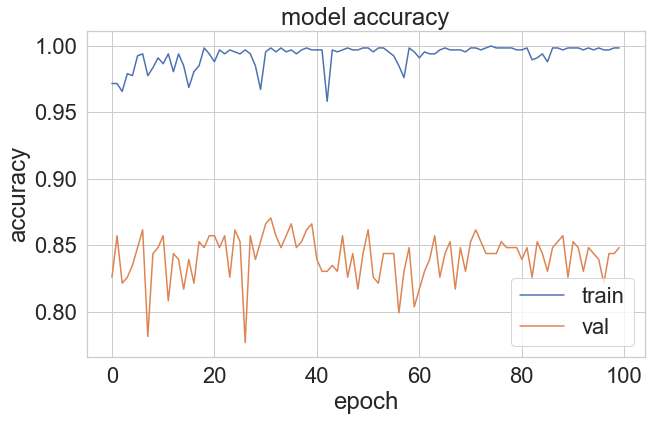

In [14]:
#plot the accuracy line for training and testing

history = history1
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [15]:
# print classification report

y_pred1 = class_weight_model.predict(X_valid, verbose=1)

classes=['No Cancer', 'Cancer']

print(classification_report(y_valid,y_pred1 > 0.5, target_names = classes ))

7/7 [==============================] - 2s 112ms/step
              precision    recall  f1-score   support

   No Cancer       0.86      0.89      0.88       134
      Cancer       0.83      0.79      0.81        90

    accuracy                           0.85       224
   macro avg       0.84      0.84      0.84       224
weighted avg       0.85      0.85      0.85       224



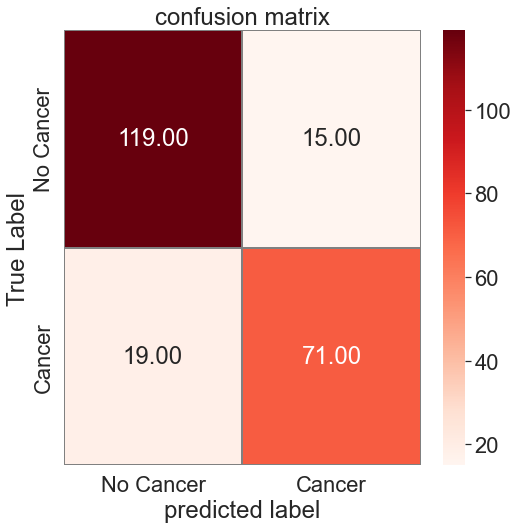

In [175]:
# print the confusion matrix

confusion_mtx = confusion_matrix(y_true=y_valid, y_pred=y_pred1 > 0.5)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax,xticklabels= classes, yticklabels= classes
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# Data Augmentation Model

In [45]:
# generate new data
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True) 
val_datagen = ImageDataGenerator()

In [46]:
# create train and validation data

train_generator = train_datagen.flow(X_train, y_train, batch_size=8) 
val_generator = val_datagen.flow(X_valid, y_valid, batch_size=8)

In [47]:
# building the model

datagen_model = Sequential()
datagen_model.add(Conv2D(32, 3, 3, input_shape= X.shape[1:]))
datagen_model.add(Activation('relu'))
datagen_model.add(MaxPooling2D(pool_size=(2, 2)))

datagen_model.add(Conv2D(32, 3, 3))
datagen_model.add(Activation('relu'))
datagen_model.add(MaxPooling2D(pool_size=(2, 2)))

datagen_model.add(Conv2D(32, 3, 3))
datagen_model.add(Activation('relu'))
datagen_model.add(MaxPooling2D(pool_size=(2, 2)))

datagen_model.add(Flatten())
datagen_model.add(Dense(64))
datagen_model.add(Activation('relu'))
datagen_model.add(Dropout(0.5))
datagen_model.add(Dense(1))
datagen_model.add(Activation('sigmoid'))

In [48]:
#compile the model

datagen_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [213]:
#train the model

start2 = time.time()

history2 = datagen_model.fit(train_generator, epochs=100, validation_data=val_generator, class_weight=new_weights)

end2 = time.time()

duration2 = end2 - start2

Epoch 1/100
84/84 [==============================] - 195s 2s/step - loss: 0.0158 - accuracy: 0.9926 - val_loss: 1.1953 - val_accuracy: 0.8304
Epoch 2/100
84/84 [==============================] - 8s 92ms/step - loss: 0.0275 - accuracy: 0.9940 - val_loss: 1.3294 - val_accuracy: 0.8125
Epoch 3/100
84/84 [==============================] - 8s 92ms/step - loss: 0.0202 - accuracy: 0.9926 - val_loss: 1.4361 - val_accuracy: 0.8259
Epoch 4/100
84/84 [==============================] - 8s 91ms/step - loss: 0.0118 - accuracy: 0.9955 - val_loss: 1.4624 - val_accuracy: 0.8170
Epoch 5/100
84/84 [==============================] - 8s 96ms/step - loss: 0.0105 - accuracy: 0.9955 - val_loss: 1.5678 - val_accuracy: 0.8214
Epoch 6/100
84/84 [==============================] - 8s 94ms/step - loss: 0.0277 - accuracy: 0.9881 - val_loss: 1.6190 - val_accuracy: 0.8036
Epoch 7/100
84/84 [==============================] - 8s 93ms/step - loss: 0.0475 - accuracy: 0.9821 - val_loss: 1.2571 - val_accuracy: 0.8348
Epoch 

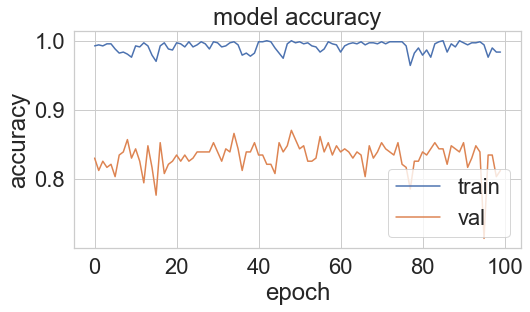

In [214]:
#plot the accuracy line for training and testing

history = history2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [216]:
# print classification report

y_pred2 = datagen_model.predict(X_valid, verbose=1)

classes=['No Cancer', 'Cancer']

print(classification_report(y_valid,y_pred2 > 0.5, target_names = classes ))

7/7 [==============================] - 1s 106ms/step
              precision    recall  f1-score   support

   No Cancer       0.80      0.92      0.85       134
      Cancer       0.84      0.66      0.74        90

    accuracy                           0.81       224
   macro avg       0.82      0.79      0.80       224
weighted avg       0.82      0.81      0.81       224



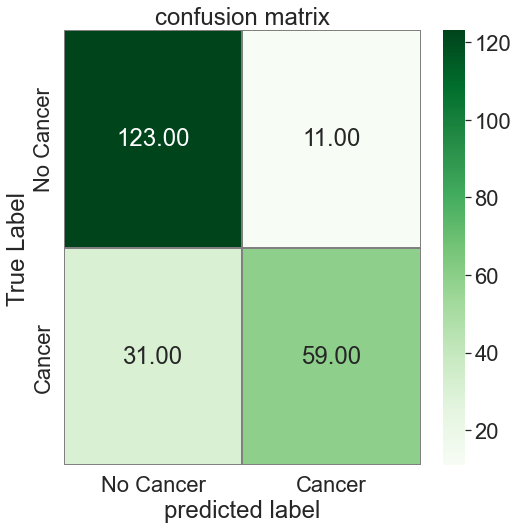

In [217]:
# plot confusion matrix

confusion_mtx = confusion_matrix(y_true=y_valid, y_pred=y_pred2 > 0.5)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax,xticklabels= classes, yticklabels= classes
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# Undersample Model

In [97]:
#create the data

data2 = []
List_res = []
img_size = 256

for i in folders:
    path = os.path.join(data_dir, i)
    class_num = folders.index(i)
    files = os.listdir(path)
    files = random.sample(files, 360)
    count = 0
    for file in files:
        filepath = os.path.join(path, file)
        count += 1
        B=[i,count]
        img = cv2.imread(filepath, 0)
        # preprocess here
        img = cv2.resize(img, (img_size, img_size))
        data2.append([img, class_num])
    List_res.append(B)
    
random.shuffle(data2)

X2, y2 = [], []
for feature, label in data2:
    X2.append(feature)
    y2.append(label)
    
print('X length:', len(X2))
print('y counts:', Counter(y2))

# normalize
X2 = np.array(X2).reshape(-1, img_size, img_size, 1)
X2 = X2 / 255.0
y2 = np.array(y2)
List_res

X length: 720
y counts: Counter({0: 360, 1: 360})


[['Benign Tumor', 360], ['Malignant Tumor', 360]]

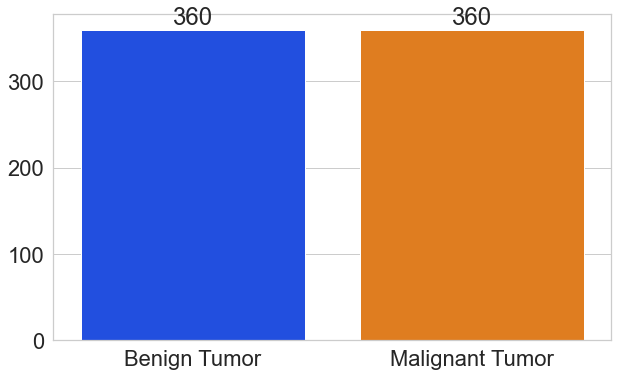

In [98]:
# plot the class distribution after data resampling

Classes_res = [item[0] for item in List_res]

Counts_res = [item[1] for item in List_res]

ax = sns.barplot(x= Classes_res,y= Counts_res,palette="bright") # plotting classes distibution

sns.set(rc={'figure.figsize':(8,4)},style="whitegrid", font_scale=2) # customize figsize,font, and color

for i in ax.containers:
    ax.bar_label(i,)

In [86]:
#split the resulted data

X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, random_state=10, stratify=y2)

In [87]:
# building the model

undersample_model = Sequential()
undersample_model.add(Conv2D(32, 3, 3, input_shape= X.shape[1:]))
undersample_model.add(Activation('relu'))
undersample_model.add(MaxPooling2D(pool_size=(2, 2)))

undersample_model.add(Conv2D(32, 3, 3))
undersample_model.add(Activation('relu'))
undersample_model.add(MaxPooling2D(pool_size=(2, 2)))

undersample_model.add(Conv2D(32, 3, 3))
undersample_model.add(Activation('relu'))
undersample_model.add(MaxPooling2D(pool_size=(2, 2)))

undersample_model.add(Flatten())
undersample_model.add(Dense(64))
undersample_model.add(Activation('relu'))
undersample_model.add(Dropout(0.5))
undersample_model.add(Dense(1))
undersample_model.add(Activation('sigmoid'))

In [88]:
# compiling model

undersample_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [206]:
# training model and calculating thr training time

start3 = time.time()

history3 = undersample_model.fit(X2_train, y2_train, batch_size=8, epochs=100, validation_data=(X_valid, y_valid))

end3 = time.time()

duration3 = end3 - start3

Epoch 1/100
68/68 [==============================] - 6s 89ms/step - loss: 0.1022 - accuracy: 0.9796 - val_loss: 0.5970 - val_accuracy: 0.9152
Epoch 2/100
68/68 [==============================] - 6s 91ms/step - loss: 0.0505 - accuracy: 0.9833 - val_loss: 0.4635 - val_accuracy: 0.9107
Epoch 3/100
68/68 [==============================] - 6s 89ms/step - loss: 0.0223 - accuracy: 0.9907 - val_loss: 0.5813 - val_accuracy: 0.9196
Epoch 4/100
68/68 [==============================] - 7s 94ms/step - loss: 0.0425 - accuracy: 0.9852 - val_loss: 0.4935 - val_accuracy: 0.9330
Epoch 5/100
68/68 [==============================] - 6s 88ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5547 - val_accuracy: 0.9330
Epoch 6/100
68/68 [==============================] - 6s 86ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5785 - val_accuracy: 0.9375
Epoch 7/100
68/68 [==============================] - 6s 86ms/step - loss: 8.2441e-04 - accuracy: 1.0000 - val_loss: 0.5917 - val_accuracy: 0.9375
Ep

Epoch 57/100
68/68 [==============================] - 6s 87ms/step - loss: 7.0163e-06 - accuracy: 1.0000 - val_loss: 0.8750 - val_accuracy: 0.9286
Epoch 58/100
68/68 [==============================] - 6s 89ms/step - loss: 1.1458e-05 - accuracy: 1.0000 - val_loss: 0.8756 - val_accuracy: 0.9286
Epoch 59/100
68/68 [==============================] - 6s 86ms/step - loss: 1.8258e-05 - accuracy: 1.0000 - val_loss: 0.8768 - val_accuracy: 0.9286
Epoch 60/100
68/68 [==============================] - 6s 87ms/step - loss: 6.8929e-05 - accuracy: 1.0000 - val_loss: 0.9185 - val_accuracy: 0.9152
Epoch 61/100
68/68 [==============================] - 6s 85ms/step - loss: 7.8081e-05 - accuracy: 1.0000 - val_loss: 0.8947 - val_accuracy: 0.9330
Epoch 62/100
68/68 [==============================] - 6s 87ms/step - loss: 1.7508e-05 - accuracy: 1.0000 - val_loss: 0.9076 - val_accuracy: 0.9330
Epoch 63/100
68/68 [==============================] - 6s 87ms/step - loss: 2.1670e-05 - accuracy: 1.0000 - val_loss: 0

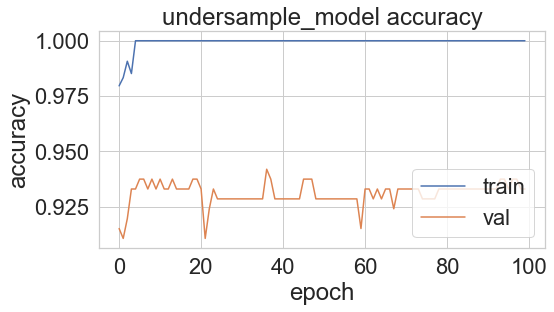

In [208]:
#plot the accuracy line for training and testing

history = history3

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('undersample_model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [209]:
# print classification report

y_pred3 = undersample_model.predict(X_valid, verbose=1)

classes=['No Cancer', 'Cancer']

print(classification_report(y_valid,y_pred3 > 0.5, target_names = classes ))

7/7 [==============================] - 1s 103ms/step
              precision    recall  f1-score   support

   No Cancer       0.95      0.93      0.94       134
      Cancer       0.90      0.93      0.92        90

    accuracy                           0.93       224
   macro avg       0.93      0.93      0.93       224
weighted avg       0.93      0.93      0.93       224



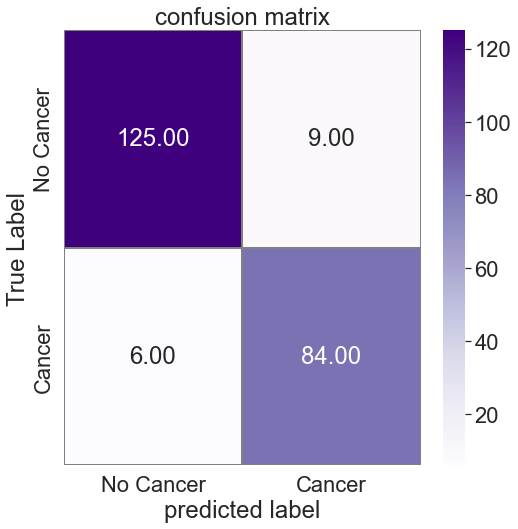

In [212]:
# plot confusion matrix

confusion_mtx = confusion_matrix(y_true=y_valid, y_pred=y_pred3 > 0.5)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Purples",
            linecolor = "gray",fmt = ".2f",ax=ax,xticklabels= classes, yticklabels= classes
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# Models Comparison

In [218]:
score1 = class_weight_model.evaluate(X_valid, y_valid, verbose = 0) # get model accuracy 
score1 = round(score1[1],2)

score2 = datagen_model.evaluate(X_valid, y_valid, verbose = 0)  # get model accuracy
score2 = round(score2[1],2)

score3 = undersample_model.evaluate(X_valid, y_valid, verbose = 0)  # get model accuracy
score3 = round(score3[1],2)

In [226]:
A = pd.DataFrame([['class_weight_model',score1, int(duration1)]]) # Convert list to dataframe
B = pd.DataFrame([['datagen_model',score2, int(duration2)]])
C = pd.DataFrame([['undersample_model',score3, int(duration3)]])

frames = [A,B,C]

Model_Table = pd.concat(frames,ignore_index = True) 

Model_Table.columns =['Model','Test Accuracy','Training Time in seconds'] # put names for columns

Model_Table

,Model,Test Accuracy,Training Time in seconds
0,class_weight_model,0.85,754
1,datagen_model,0.81,1042
2,undersample_model,0.93,616


# Save The best Model

In [227]:
%%capture

S = pickle.dumps(undersample_model) # Save model
Model = pickle.loads(S); # Load model

# Prediction on new examples

In [232]:
# an useful function to convert numeric result to understod result 

def num_to_str(result):
    if result == 0:
        print('The result of prediction is a benign tumor, so there is no cancer breast')
    else:
        print('The result of prediction is a malignant tumor, so there is a cancer breast')

In [231]:
# prediction function that take an image as input and give the result of classification
def Predict(path):
    img_size = 256 
    
    #Read the image from the path
    img = cv2.imread(path, 0)  
    
    #Resize the length and width of the image to be 256
    img = cv2.resize(img, (img_size, img_size))
    
    #Convert to numpy array
    img = np.array(img).reshape(-1, img_size, img_size, 1)
    
    #Scale the image array
    img = img / 255.0
    
    proba = 0
    #Predict the result using the model
    result = Model.predict(img)
    if result[0][0] <= 0.5:
        result = 0
    else: result = 1
    
    num_to_str(result)

1/1 [==============================] - 0s 205ms/step
The result of prediction is a benign tumor, so there is no cancer breast


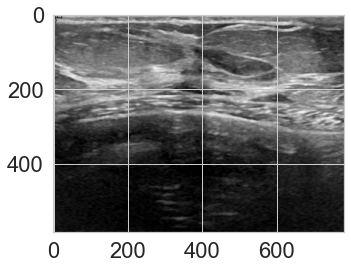

In [249]:
path = r"C:\Users/is benign  (1).png"

img=mpimg.imread(path)       # Read the image
imgplot = plt.imshow(img)    # Show the image

Predict(path) # Predict the result

1/1 [==============================] - 0s 178ms/step
The result of prediction is a benign tumor, so there is no cancer breast


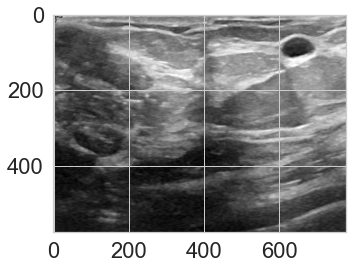

In [250]:
path = r"C:\Users/is benign  (2).png"

img=mpimg.imread(path)       # Read the image
imgplot = plt.imshow(img)    # Show the image

Predict(path) # Predict the result

1/1 [==============================] - 0s 151ms/step
The result of prediction is a benign tumor, so there is no cancer breast


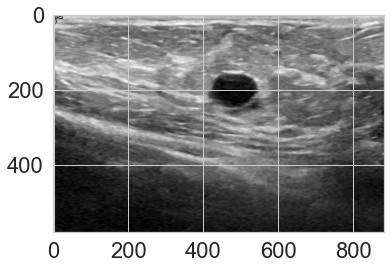

In [251]:
path = r"C:\Users/is benign  (3).png"

img=mpimg.imread(path)       # Read the image
imgplot = plt.imshow(img)    # Show the image

Predict(path) # Predict the result

1/1 [==============================] - 0s 384ms/step
The result of prediction is a malignant tumor, so there is a cancer breast


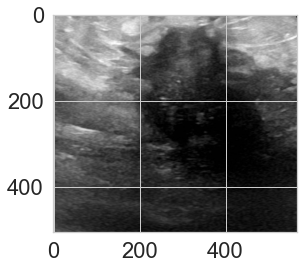

In [252]:
path = r"C:\Users/is malignant (1).png"

img=mpimg.imread(path)       # Read the image
imgplot = plt.imshow(img)    # Show the image

Predict(path) # Predict the result

1/1 [==============================] - 0s 356ms/step
The result of prediction is a malignant tumor, so there is a cancer breast


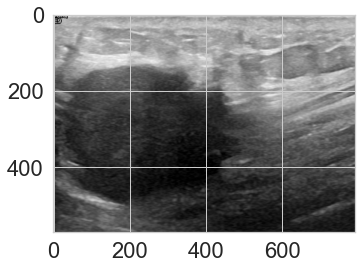

In [253]:
path = r"C:\Users/is malignant (2).png"

img=mpimg.imread(path)       # Read the image
imgplot = plt.imshow(img)    # Show the image

Predict(path) # Predict the result

1/1 [==============================] - 0s 136ms/step
The result of prediction is a malignant tumor, so there is a cancer breast


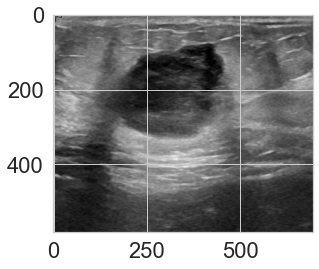

In [254]:
path = r"C:\Users/is malignant (3).png"

img=mpimg.imread(path)       # Read the image
imgplot = plt.imshow(img)    # Show the image

Predict(path) # Predict the result

# Well Done!